# Homework 2 - Data from the Web

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Question 1 - 

### Part 1 - Extracting the Data of the website

In [2]:
#TopUniversities.com
r = requests.get("https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508602165358")
dic = r.json()['data']
dic[0]

{'cc': 'US',
 'core_id': '410',
 'country': 'United States',
 'guide': '<a href="/where-to-study/north-america/united-states/guide" class="guide-link" target="_blank">United States</a>',
 'logo': '<img src="https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small_0.jpg" alt="Massachusetts Institute of Technology (MIT)  Logo">',
 'nid': '294850',
 'rank_display': '1',
 'region': 'North America',
 'score': '100',
 'stars': '6',
 'title': 'Massachusetts Institute of Technology (MIT)',
 'url': '/universities/massachusetts-institute-technology-mit'}

In [3]:
for univ in dic[:200]:
    #Get information from second page
    r2 = requests.get("https://www.topuniversities.com" + univ['url'])
    univ['soup'] = BeautifulSoup(r2.text, 'html.parser')

In [92]:
data_list = []
for univ in dic[:200]:
    #First page information
    row = {'Name':univ['title'],'Rank':univ['rank_display'],'Country':univ['country'],'Region':univ['region']}
    
    #Second page information
    try:
        row['Number of students'] = univ['soup'].find('div',class_ = "total student").find('div',class_="number").string[1:-1]
        row['Number of international students'] = univ['soup'].find('div',class_ = "total inter").find('div',class_="number").string[1:-1]
    
        list_score = list(map(lambda x:float(x.string),univ['soup'].find('ul',class_='score').find_all('div',class_='text')))[1:]
        list_score += [np.nan]*(6-len(list_score))
        row['Score_1'],row['Score_2'],row['Score_3'],row['Score_4'],row['Score_5'],row['Score_6'] = list_score
        row['Number of faculty members'] = univ['soup'].find('div',class_ = "total faculty").find('div',class_="number").string[1:-1]
        row['Number of international members'] = univ['soup'].find('div',class_ = "inter faculty").find('div',class_="number").string[1:-1]
    except:
        print(univ['title'], univ['rank_display'])
        
    data_list.append(row)

New York University (NYU) 52
Indian Institute of Science (IISc) Bangalore 190


In [93]:
data_1 = pd.DataFrame(data_list)
data_1 = data_1[['Name','Rank','Country','Region','Number of faculty members','Number of international members','Number of students', 'Number of international students','Score_1','Score_2','Score_3','Score_4','Score_5','Score_6']]

pd.set_option('display.max_rows', 200)
data_1

#199-201 wrong -> should be 198-200

,Name,Rank,Country,Region,Number of faculty members,Number of international members,Number of students,Number of international students,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6
0,Massachusetts Institute of Technology (MIT),1,United States,North America,"2,982","1,679","11,067","3,717",100.0,99.9,100.0,100.0,100.0,96.1
1,Stanford University,2,United States,North America,"4,285","2,042","15,878","3,611",100.0,99.4,100.0,100.0,99.6,72.7
2,Harvard University,3,United States,North America,"4,350","1,311","22,429","5,266",100.0,99.9,100.0,98.3,96.5,75.2
3,California Institute of Technology (Caltech),4,United States,North America,953,350,"2,255",647,99.5,100.0,85.4,100.0,93.4,89.2
4,University of Cambridge,5,United Kingdom,Europe,"5,490","2,278","18,770","6,699",100.0,78.3,100.0,100.0,97.4,97.7
5,University of Oxford,6,United Kingdom,Europe,"6,750","2,964","19,720","7,353",100.0,76.3,100.0,100.0,98.6,98.5
6,UCL (University College London),7,United Kingdom,Europe,"6,345","2,554","31,080","14,854",99.7,74.7,99.5,99.1,96.6,100.0
7,Imperial College London,8,United Kingdom,Europe,"3,930","2,071","16,090","8,746",99.4,68.7,100.0,100.0,100.0,100.0
8,University of Chicago,9,United States,North America,"2,449",635,"13,557","3,379",99.9,85.9,92.9,96.5,71.9,79.8
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,"2,477","1,886","19,815","7,563",99.6,98.7,99.4,68.2,100.0,98.8


### Part 2 - Modify the data types and add new columns

First we modify the data types when it is relevant ('rank' -> int, 'number of faculty members' -> int, ...)
We use '.apply' to the specific column to modify the data type, and also filter the string. For example '12,544' is filtered as 12544.

Then we add columns 'staff-students ratio' and 'int-students ratio' : we use 'number of faculty members' and 'number of students' to compute the 'staff-students ratio'. We do similarly for the other ratio.

In [94]:
## Modify the data types for the 1st data frame

# type: int BUT in practice type: float because some columns have NaN values and type(NaN)=float
data_1['Rank'] = data_1['Rank'].apply(lambda x : int(x.replace('=','')))
data_1['Number of faculty members'] = data_1['Number of faculty members'].apply(lambda x : int(x.replace(',','')) if type(x)== str else np.nan)
data_1['Number of international members'] = data_1['Number of international members'].apply(lambda x : int(x.replace(',','')) if type(x)== str else np.nan)
data_1['Number of students'] = data_1['Number of students'].apply(lambda x : int(x.replace(',','')) if type(x)== str else np.nan)
data_1['Number of international students'] = data_1['Number of international students'].apply(lambda x : int(x.replace(',','')) if type(x)== str else np.nan)

## Add columns which are consistent with the first data_frame

# Number of faculty members (type: int)
data_1['staff-students ratio'] = data_1['Number of faculty members'] / data_1['Number of students']

# Number of international students (type: int)
data_1['int-students ratio'] = data_1['Number of international students'] /data_1['Number of students']

### Part 3 - Charts and discussion

The plots work similarly for each ratio. Here is a detail of the code for the staff-students ratio:

- Best universities: we sort by the ratio and plot the head() of the dataframe
- Best country: we group by country, sum the columns 'Number of faculty members' and 'Number of students', and re-compute the ratio
- Best region: we group by region, sum the columns 'Number of faculty members' and'Number of students', and re-compute the ratio

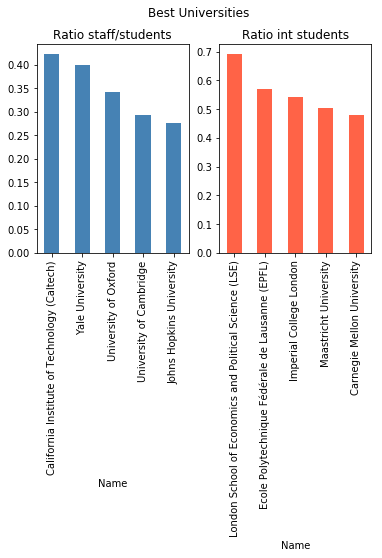

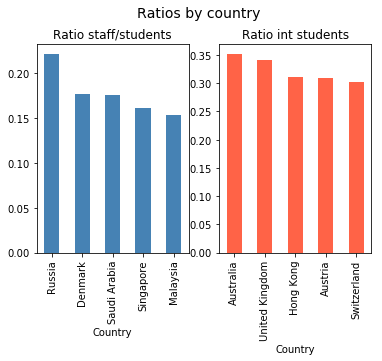

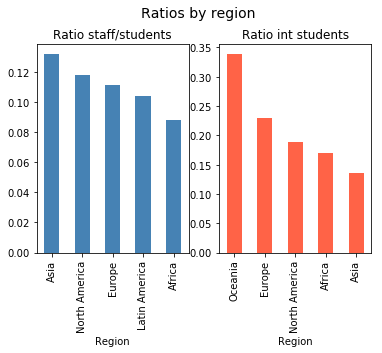

In [95]:
## Plot the Best universities for each ratio
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Best Universities", fontsize=12)

g1 = data_1.sort_values(by='staff-students ratio',ascending=False)
g1.head().set_index('Name')['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_1.sort_values(by='int-students ratio',ascending=False)
g2.head().set_index('Name')['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()


## Group by country
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Ratios by country", fontsize=14)

g1 = data_1.groupby('Country')[['Number of faculty members','Number of students']].sum()
g1['staff-students ratio'] = g1['Number of faculty members'] / g1['Number of students']
g1 = g1.sort_values(by='staff-students ratio',ascending=False)
g1.head()['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_1.groupby('Country')[['Number of international students','Number of students']].sum()
g2['int-students ratio'] = g2['Number of international students'] / g2['Number of students']
g2 = g2.sort_values(by='int-students ratio',ascending=False)
g2.head()['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()

## Group by region
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Ratios by region", fontsize=14)

g1 = data_1.groupby('Region')[['Number of faculty members','Number of students']].sum()
g1['staff-students ratio'] = g1['Number of faculty members'] / g1['Number of students']
g1 = g1.sort_values(by='staff-students ratio',ascending=False)
g1.head()['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_1.groupby('Region')[['Number of international students','Number of students']].sum()
g2['int-students ratio'] = g2['Number of international students'] / g2['Number of students']
g2 = g2.sort_values(by='int-students ratio',ascending=False)
g2.head()['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()




We observe that EPFL has a pretty good ratio of international students, as well as Switzerland in general.

For the graphs of staff/students ratio, we see that the best universities for the ratio are not in the best countries for the ratio. This means this ratio is very specific to the school, and can be very different for numerous schools in the same country.

## Question 2 -

### Part 1 - extracting the data

In [84]:
##TimesHigherEducation

r3 = requests.get("https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json")
list_univ = r3.json()['data']

In [96]:
data_2 = pd.DataFrame(list_univ[:200])
data_2 = data_2[['name','location','rank','stats_number_students','stats_pc_intl_students','stats_student_staff_ratio','scores_citations','scores_industry_income','scores_international_outlook','scores_research','scores_teaching']]
data_2.columns = ['Name','Country','Rank','Number of students','Percentage of international students','Students-Staff ratio','Score_7','Score_8','Score_9','Score_10','Score_11']
data_2[['Score_'+str(i) for i in range(7,12)]] = data_2[['Score_'+str(i) for i in range(7,12)]].apply(pd.to_numeric)

### Part 2 - Modify the data types and add new columns

We proceed similarly to part 1.

First we modify the data types when it is relevant ('rank' -> int, 'number of faculty members' -> int, ...)
We use '.apply' to the specific column to modify the data type, and also filter the string. For example '12,544' is filtered as 12544.

Then we add columns 'staff-students ratio' and 'int-students ratio'.

We also add columns 'Number of faculty members' and 'Number of international students' to have consistent data with the first dataframe. For the region column, we create a dictionary {country:region}.

In [97]:
## Modify the data types for the 2nd data frame

# type: int
data_2['Rank'] = data_2['Rank'].apply(lambda x : int(x.replace('=','')))
data_2['Number of students'] = data_2['Number of students'].apply(lambda x : int(x.replace(',','')))

# type: float
data_2['Percentage of international students'] = data_2['Percentage of international students'].apply(lambda x : float(x.replace('%','')))
data_2['Students-Staff ratio'] = data_2['Students-Staff ratio'].apply(lambda x : float(x))


## Add ratio columns

# Number of faculty members (type: int)
data_2['staff-students ratio'] = 1 / data_2['Students-Staff ratio']

# Number of international students (type: int)
data_2['int-students ratio'] = data_2['Percentage of international students'] /100


## Add columns which are consistent with the first data_frame

# Number of faculty members (type: int)
data_2['Number of faculty members'] = data_2['Number of students'] / data_2['Students-Staff ratio']
data_2['Number of faculty members'] = data_2['Number of faculty members'].apply(lambda x : int(x))

# Number of international students (type: int)
data_2['Number of international students'] = data_2['Number of students'] *data_2['Percentage of international students'] /100
data_2['Number of international students'] = data_2['Number of international students'].apply(lambda x : int(x))

In [87]:
dict_region = {'Argentina': 'Latin America','Australia': 'Oceania',
'Austria': 'Europe','Belgium': 'Europe',
'Brazil': 'Latin America','Canada': 'North America',
'Chile': 'Latin America','China': 'Asia','Denmark': 'Europe',
'Finland': 'Europe','France': 'Europe','Germany': 'Europe',
'Hong Kong': 'Asia','India': 'Asia','Ireland': 'Europe','Israel': 'Asia',
'Italy': 'Europe','Japan': 'Asia','Malaysia': 'Asia','Mexico': 'Latin America',
'Netherlands': 'Europe','New Zealand': 'Oceania','Norway': 'Europe','Russian Federation': 'Europe',
'Saudi Arabia': 'Asia','Singapore': 'Asia','South Africa': 'Africa','South Korea': 'Asia',
'Spain': 'Europe','Sweden': 'Europe','Switzerland': 'Europe','Taiwan': 'Asia',
'United Kingdom': 'Europe','United States': 'North America', 'Luxembourg': 'Europe'}

In [98]:
data_2['Region'] = data_2['Country']
data_2 = data_2.replace({'Region': dict_region})
data_2

,Name,Country,Rank,Number of students,Percentage of international students,Students-Staff ratio,Score_7,Score_8,Score_9,Score_10,Score_11,staff-students ratio,int-students ratio,Number of faculty members,Number of international students,Region
0,University of Oxford,United Kingdom,1,20409,38.0,11.2,99.1,63.7,95.0,99.5,86.7,0.089286,0.38,1822,7755,Europe
1,University of Cambridge,United Kingdom,2,18389,35.0,10.9,97.5,51.5,93.0,97.8,87.8,0.091743,0.35,1687,6436,Europe
2,California Institute of Technology,United States,3,2209,27.0,6.5,99.5,92.6,59.7,97.5,90.3,0.153846,0.27,339,596,North America
3,Stanford University,United States,3,15845,22.0,7.5,99.9,60.5,77.6,96.7,89.1,0.133333,0.22,2112,3485,North America
4,Massachusetts Institute of Technology,United States,5,11177,34.0,8.7,100.0,88.4,87.6,91.9,87.3,0.114943,0.34,1284,3800,North America
5,Harvard University,United States,6,20326,26.0,8.9,99.7,46.4,79.7,98.4,84.2,0.112360,0.26,2283,5284,North America
6,Princeton University,United States,7,7955,24.0,8.3,99.6,58.0,78.7,93.9,85.7,0.120482,0.24,958,1909,North America
7,Imperial College London,United Kingdom,8,15857,55.0,11.4,96.7,71.6,96.6,88.7,81.7,0.087719,0.55,1390,8721,Europe
8,University of Chicago,United States,9,13525,25.0,6.2,99.4,39.8,69.6,90.1,85.3,0.161290,0.25,2181,3381,North America
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,10,19233,38.0,14.6,94.3,60.3,98.1,92.0,76.4,0.068493,0.38,1317,7308,Europe


### Part 3 - Charts and discussion

The plots work similarly for each ratio. Here is a detail of the code for the staff-students ratio:

- Best universities: we sort by the ratio and plot the head() of the dataframe
- Best country: we group by country, sum the columns 'Number of faculty members' and 'Number of students', and re-compute the ratio
- Best region: we group by region, then sum the columns 'Number of faculty members' and'Number of students', and re-compute the ratio



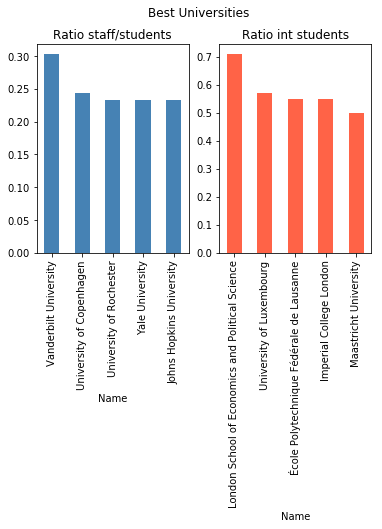

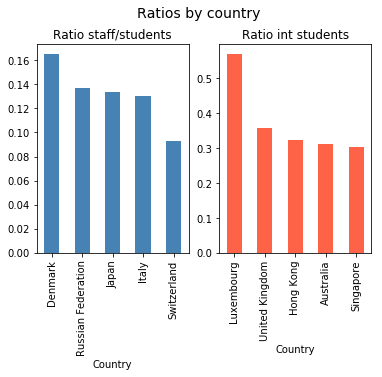

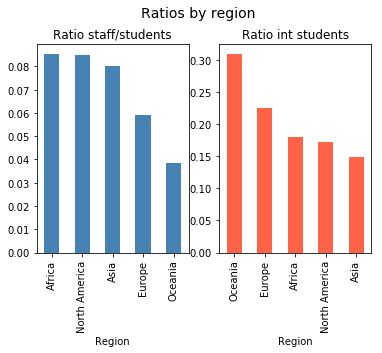

In [99]:
## Plot the Best universities for each ratio
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Best Universities", fontsize=12)

g1 = data_2.sort_values(by='staff-students ratio',ascending=False)
g1.head().set_index('Name')['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_2.sort_values(by='int-students ratio',ascending=False)
g2.head().set_index('Name')['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()


## Group by country
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Ratios by country", fontsize=14)

g1 = data_2.groupby('Country')[['Number of faculty members','Number of students']].sum()
g1['staff-students ratio'] = g1['Number of faculty members'] / g1['Number of students']
g1 = g1.sort_values(by='staff-students ratio',ascending=False)
g1.head()['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_2.groupby('Country')[['Number of international students','Number of students']].sum()
g2['int-students ratio'] = g2['Number of international students'] / g2['Number of students']
g2 = g2.sort_values(by='int-students ratio',ascending=False)
g2.head()['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()

## Group by region
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(top=.85)
fig.suptitle("Ratios by region", fontsize=14)

g1 = data_2.groupby('Region')[['Number of faculty members','Number of students']].sum()
g1['staff-students ratio'] = g1['Number of faculty members'] / g1['Number of students']
g1 = g1.sort_values(by='staff-students ratio',ascending=False)
g1.head()['staff-students ratio'].plot(kind='bar', color='steelblue', ax=axes[0], title ="Ratio staff/students")

g2 = data_2.groupby('Region')[['Number of international students','Number of students']].sum()
g2['int-students ratio'] = g2['Number of international students'] / g2['Number of students']
g2 = g2.sort_values(by='int-students ratio',ascending=False)
g2.head()['int-students ratio'].plot(kind='bar', color='tomato', ax=axes[1], title ="Ratio int students")

plt.show()




We observe that the values are slightly different from the first tables.
Once again, small countries get better average ratios because there are less representative universities.

# Question 3

In [100]:
#Wikibooks
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 # j+1 instead of j since previous_row and current_row are one character longer
            deletions = current_row[j] + 1       # than s2
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]/max(len(s1),len(s2))

In [101]:
data_1['dummy'] = 1
data_2['dummy'] = 1
#Compressing 'University' and 'Institute'
data_1['Name'] = data_1['Name'].apply(lambda x: x.replace('University','%').replace('Institute','#'))
data_2['Name'] = data_2['Name'].apply(lambda x: x.replace('University','%').replace('Institute','#'))

merge_data = pd.merge(data_1,data_2,on=['dummy'],suffixes=['_1','_2'])
merge_data['dist'] = merge_data.apply(lambda x: levenshtein(x['Name_1'],x['Name_2']),axis = 1)

In [102]:
data_tronc = merge_data[merge_data['dist'] < 0.4][['Name_1','Name_2','dist']]
data_tronc

,Name_1,Name_2,dist
4,Massachusetts # of Technology (MIT),Massachusetts # of Technology,0.171429
203,Stanford %,Stanford %,0.000000
405,Harvard %,Harvard %,0.000000
602,California # of Technology (Caltech),California # of Technology,0.277778
801,% of Cambridge,% of Cambridge,0.000000
1000,% of Oxford,% of Oxford,0.000000
1137,% of Oxford,% of York,0.363636
1145,% of Oxford,% of Oslo,0.363636
1207,UCL (% College London),Imperial College London,0.391304
1215,UCL (% College London),% College London,0.272727


In [103]:
from munkres import Munkres
m = Munkres()
names_1 = list(set(data_tronc['Name_1']))
names_2 = list(set(data_tronc['Name_2']))
index_1 = {val:i for i,val in enumerate(names_1)}
index_2 = {val:i for i,val in enumerate(names_2)}
matrix = [[1]*(len(names_1) + len(names_2)) for x in [0]*(len(names_1) + len(names_2))]

for ind,x in data_tronc.iterrows():
    matrix[index_1[x['Name_1']]][index_2[x['Name_2']]] = x['dist']
indexes = m.compute(matrix)
    
pair = [[names_1[i],names_2[j]] for i,j in indexes if i < len(names_1) and j < len(names_2) and matrix[i][j] < 0.4]

match_pair = pd.DataFrame(pair)
match_pair.columns = ['Name_1','Name_2']
match_pair

,Name_1,Name_2
0,KAIST - Korea Advanced # of Science & Technology,Korea Advanced # of Science and Technology (KA...
1,McMaster %,McMaster %
2,% of Toronto,% of Toronto
3,UCL (% College London),% College London
4,Utrecht %,Utrecht %
5,Boston %,Boston %
6,McGill %,McGill %
7,King's College London,King’s College London
8,The % of Hong Kong,% of Hong Kong
9,Peking %,Peking %


In [104]:
data_1.columns = ['Name_1'] + list(data_1.columns)[1:]
data_2.columns = ['Name_2'] + list(data_2.columns)[1:]

data_left = pd.merge(data_1,match_pair,how='outer')

data_right = pd.merge(data_2,match_pair,how='outer')

data_combined = pd.merge(data_left,data_right,how='outer',on=['Name_1','Name_2'],suffixes=['_1','_2'])
data_combined = data_combined[data_combined['Country_1'] == data_combined['Country_2']]
data_combined = data_combined[['Name_1','Rank_1','Rank_2','Country_1','Region_1','Number of students_1','Number of students_2','Number of faculty members_1','Number of faculty members_2','Students-Staff ratio','Number of international members','Percentage of international students','Score_1','Score_2','Score_3','Score_4','Score_5','Score_6','Score_7','Score_8','Score_9','Score_10','Score_11']]
data_combined['Name_1'] = data_combined['Name_1'].apply(lambda x: x.replace('%','University').replace('#','Institute'))
data_combined

,Name_1,Rank_1,Rank_2,Country_1,Region_1,Number of students_1,Number of students_2,Number of faculty members_1,Number of faculty members_2,Students-Staff ratio,...,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,Score_9,Score_10,Score_11
0,Massachusetts Institute of Technology (MIT),1.0,5.0,United States,North America,11067.0,11177.0,2982.0,1284.0,8.7,...,99.9,100.0,100.0,100.0,96.1,100.0,88.4,87.6,91.9,87.3
1,Stanford University,2.0,3.0,United States,North America,15878.0,15845.0,4285.0,2112.0,7.5,...,99.4,100.0,100.0,99.6,72.7,99.9,60.5,77.6,96.7,89.1
2,Harvard University,3.0,6.0,United States,North America,22429.0,20326.0,4350.0,2283.0,8.9,...,99.9,100.0,98.3,96.5,75.2,99.7,46.4,79.7,98.4,84.2
3,California Institute of Technology (Caltech),4.0,3.0,United States,North America,2255.0,2209.0,953.0,339.0,6.5,...,100.0,85.4,100.0,93.4,89.2,99.5,92.6,59.7,97.5,90.3
4,University of Cambridge,5.0,2.0,United Kingdom,Europe,18770.0,18389.0,5490.0,1687.0,10.9,...,78.3,100.0,100.0,97.4,97.7,97.5,51.5,93.0,97.8,87.8
5,University of Oxford,6.0,1.0,United Kingdom,Europe,19720.0,20409.0,6750.0,1822.0,11.2,...,76.3,100.0,100.0,98.6,98.5,99.1,63.7,95.0,99.5,86.7
6,UCL (University College London),7.0,16.0,United Kingdom,Europe,31080.0,30304.0,6345.0,2886.0,10.5,...,74.7,99.5,99.1,96.6,100.0,94.6,41.2,94.6,88.2,74.4
7,Imperial College London,8.0,8.0,United Kingdom,Europe,16090.0,15857.0,3930.0,1390.0,11.4,...,68.7,100.0,100.0,100.0,100.0,96.7,71.6,96.6,88.7,81.7
8,University of Chicago,9.0,9.0,United States,North America,13557.0,13525.0,2449.0,2181.0,6.2,...,85.9,92.9,96.5,71.9,79.8,99.4,39.8,69.6,90.1,85.3
9,ETH Zurich - Swiss Federal Institute of Techno...,10.0,10.0,Switzerland,Europe,19815.0,19233.0,2477.0,1317.0,14.6,...,98.7,99.4,68.2,100.0,98.8,94.3,60.3,98.1,92.0,76.4


# Question 5

In [112]:
data_combined['Our Score'] = data_combined[['Score_' + str(i) for i in range(1,12)]].mean(axis = 1)
data_combined[['Name_1','Rank_1','Rank_2','Our Score']].sort_values('Our Score',ascending=False).reset_index()

,index,Name_1,Rank_1,Rank_2,Our Score
0,0,Massachusetts Institute of Technology (MIT),1.0,5.0,95.563636
1,5,University of Oxford,6.0,1.0,92.490909
2,3,California Institute of Technology (Caltech),4.0,3.0,91.554545
3,7,Imperial College London,8.0,8.0,91.218182
4,4,University of Cambridge,5.0,2.0,91.000000
5,1,Stanford University,2.0,3.0,90.500000
6,9,ETH Zurich - Swiss Federal Institute of Techno...,10.0,10.0,89.618182
7,2,Harvard University,3.0,6.0,88.936364
8,11,Ecole Polytechnique Fédérale de Lausanne (EPFL),12.0,38.0,87.654545
9,6,UCL (University College London),7.0,16.0,87.509091
